#Data Diri
1. Nama : Muhammad Hafiz Aditya
2. Email : mha.hafiz21@gmail.com
3. Asal Daerah : Kabupaten Magelang, Jawa Tengah
4. Tanggal Bergabung : 10 Juni 2021


#Proyek Akhir
Program jaringan saraf tiruan menggunakan TensorFlow yang mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

In [ ]:
!pip install keras-tuner

In [21]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-28 12:08:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.89MB/s    in 52s     

2021-06-28 12:09:44 (5.92 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# Ekstrak file
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
import os

os.listdir("/tmp/rockpaperscissors")

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [ ]:
pip install split_folders

In [8]:
# Split the data into for training and validation (60/40)
import splitfolders

data_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(data_dir, output="/tmp/rockpaperscissors", ratio=(.6, .4))

Copying files: 2188 files [00:00, 4660.27 files/s]


In [9]:
train_dir = os.path.join("/tmp/rockpaperscissors","train")
val_dir = os.path.join("/tmp/rockpaperscissors","val")

In [10]:
#Define location each category for train and val
train_rock = os.path.join(train_dir,"rock")
train_paper = os.path.join(train_dir,"paper")
train_scissors = os.path.join(train_dir,"scissors")

val_rock = os.path.join(val_dir,"rock")
val_paper = os.path.join(val_dir,"paper")
val_scissors = os.path.join(val_dir,"scissors")

In [11]:
# Image Augmentation
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(100, 100),
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [33]:
# Create the model

def create_model(hp):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(hp.Int("input_unit", 32, 256, 32),
                                   (3,3), activation='relu',
                                   input_shape=(100, 100, 3)))
  model.add(tf.keras.layers.MaxPooling2D(2, 2))

  for i in range(hp.Int('n_layers', 1, 4)):
    model.add(tf.keras.layers.Conv2D(hp.Int(f"conv_{i}", 32, 256, 32),
                                     (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2,2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [36]:
# Using keras_tuner to find the best parameter

import time
log = f"{int(time.time())}"

tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=3,
    directory=log)

tuner.search(train_generator,
             verbose=1,
             epochs=15,
             batch_size=32,
             validation_data=(validation_generator))

Trial 1 Complete [00h 07m 30s]
val_accuracy: 0.5494672854741415

Best val_accuracy So Far: 0.5494672854741415
Total elapsed time: 00h 07m 30s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the best parameter for the model

model = tuner.get_best_models(num_models=1)[0]

In [44]:
# Fit the model

model.fit(train_generator, steps_per_epoch=25, epochs=15, validation_data=validation_generator, validation_steps=5)

Epoch 1/15
25/25 [==============================] - 1s 31ms/step - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 2/15
25/25 [==============================] - 1s 26ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 3.3626e-04 - val_accuracy: 1.0000
Epoch 3/15
25/25 [==============================] - 1s 25ms/step - loss: 0.0818 - accuracy: 0.9700 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4/15
25/25 [==============================] - 1s 26ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 5/15
25/25 [==============================] - 1s 27ms/step - loss: 0.1445 - accuracy: 0.9700 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 6/15
25/25 [==============================] - 1s 24ms/step - loss: 0.0408 - accuracy: 0.9800 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 7/15
25/25 [==============================] - 1s 26ms/step - loss: 0.0989 - accuracy: 0.9800 - val_loss: 0.0775 - val_accuracy: 0.9500
Epoch 8/1

Saving WhatsApp Image 2021-06-28 at 17.57.45.jpeg to WhatsApp Image 2021-06-28 at 17.57.45 (1).jpeg
WhatsApp Image 2021-06-28 at 17.57.45.jpeg
[[1. 0. 0.]]
Paper


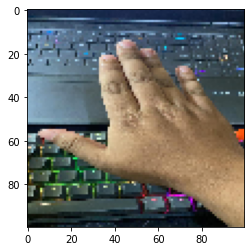

In [48]:
# Try using it

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0] == 1:
    print("Paper")
  elif classes[0][1] == 1:
    print("Rock")
  else:
    print("Scissors")